## 引用Keras

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D


Using TensorFlow backend.


## 讀取MNIST 數據

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(60000, 28,28,1)
x_test  = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

In [6]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test, n_classes)

## 設定網路參數

In [7]:
n_hidden_1 = 256 
n_classes  = 10 

training_epochs = 15
batch_size = 100

## 建立卷積神經網路

In [8]:
model = keras.Sequential()
model.add(Conv2D(
            filters=16,
            kernel_size = (3,3),
            padding = 'same',
            input_shape = (28,28,1), 
            activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(n_hidden_1, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


## 訓練神經網路

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.2057 - acc: 0.9396 - val_loss: 0.0887 - val_acc: 0.9722
Epoch 2/15
60000/60000 [==============================] - 11s 184us/step - loss: 0.0644 - acc: 0.9809 - val_loss: 0.0544 - val_acc: 0.9829
Epoch 3/15
60000/60000 [==============================] - 12s 194us/step - loss: 0.0429 - acc: 0.9869 - val_loss: 0.0484 - val_acc: 0.9836
Epoch 4/15
60000/60000 [==============================] - 12s 197us/step - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0441 - val_acc: 0.9858
Epoch 5/15
60000/60000 [==============================] - 12s 199us/step - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0460 - val_acc: 0.9851
Epoch 6/15
60000/60000 [==============================] - 12s 204us/step - loss: 0.0157 - acc: 0.9951 - val_loss: 0.0486 - val_acc: 0.9844
Epoch 7/15
60000/60000 [==============================] - 12s 199us/step - loss: 0.0113 - acc: 0.9968 - val_loss: 0.

## 辨識數字

In [11]:
from PIL import Image
import numpy
img = Image.open('/Users/davidchiu/Desktop/4.jpg').convert('L')
img  = numpy.asarray(img) 

In [13]:
img2 = (255 - img) / 255 

In [15]:
img3 = img2.reshape(28,28,1)

In [16]:
y = numpy.array([img3])

In [17]:
numpy.argmax(model.predict(y))

4

## 驗證碼破解

### 抓取驗證碼

In [95]:
import requests
res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg?code=0.4599771997252926')
with open('captcha.jpg', 'wb') as f:
    f.write(res.content)

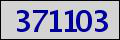

In [96]:
from PIL import Image
Image.open('captcha.jpg')

### 使用OpenCV 切驗證碼

In [97]:
pil_image = Image.open('captcha.jpg').convert('L') 

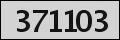

In [98]:
pil_image

In [99]:
open_cv_image = numpy.array(pil_image) 
open_cv_image.shape

(40, 120)

In [100]:
open_cv_image

array([[  0,  10,   0, ...,   0,  10,   0],
       [ 14, 188, 215, ..., 215, 188,  14],
       [  0, 217, 223, ..., 223, 217,   0],
       ...,
       [  0, 217, 223, ..., 223, 217,   0],
       [ 14, 188, 215, ..., 215, 188,  14],
       [  0,  10,   0, ...,   0,  10,   0]], dtype=uint8)

In [101]:
import cv2
ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)

In [102]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [103]:
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [104]:
cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])


In [105]:
ary = []
for (c,_) in cnts:
    (x,y,w,h) = cv2.boundingRect(c)
    print(x,y,w,h)
    if w >= 10 and w <= 25 and h >= 24:
        ary.append((x,y,w,h) )

1 1 118 38
16 9 15 24
32 9 17 24
49 9 14 24
64 9 14 24
75 9 18 24
80 13 8 16
94 9 15 24


In [106]:
ary

[(16, 9, 15, 24),
 (32, 9, 17, 24),
 (49, 9, 14, 24),
 (64, 9, 14, 24),
 (75, 9, 18, 24),
 (94, 9, 15, 24)]

In [108]:
import os
dest = 'digits/'
#os.mkdir(dest)

In [109]:
#for i in range(0,10):
#    os.mkdir(dest+str(i))

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


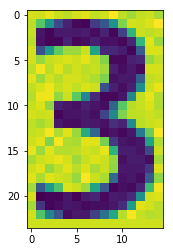

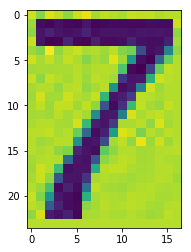

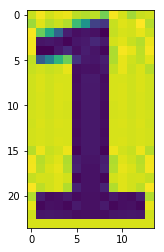

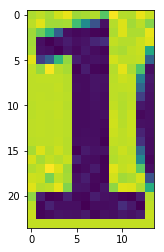

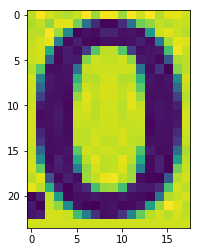

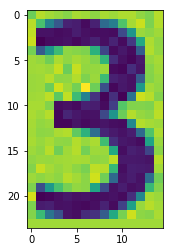

In [110]:
%pylab inline
from matplotlib import pyplot as plt
data = []
for idx, (x,y,w,h) in enumerate(ary):
    fig = plt.figure()
    roi = open_cv_image[y:y+h, x:x+w]
    thresh = roi.copy()
    plt.imshow(thresh)
    plt.savefig(os.path.join(dest, '{}.jpg'.format(idx)), dpi=100)

In [123]:
import random
random.random()

0.9508377651837443

In [130]:

def getCaptcha(run):
    res = requests.get('https://serv.gcis.nat.gov.tw/pub/kaptcha.jpg?code={}'.format(random.random()))
    with open('captcha.jpg', 'wb') as f:
        f.write(res.content)
    
    pil_image = Image.open('captcha.jpg').convert('L')
    open_cv_image = numpy.array(pil_image) 
    ret, thresh = cv2.threshold(open_cv_image, 127, 255, 0)
    image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnts = sorted([(c, cv2.boundingRect(c)[0]) for c in contours], key=lambda x:x[1])
    ary = []
    for (c,_) in cnts:
        (x,y,w,h) = cv2.boundingRect(c)
        #print(x,y,w,h)
        if w >= 10 and w <= 25 and h >= 24:
            ary.append((x,y,w,h) )
    data = []
    for idx, (x,y,w,h) in enumerate(ary):
        fig = plt.figure()
        roi = open_cv_image[y:y+h, x:x+w]
        thresh = roi.copy()
        plt.imshow(thresh)
        plt.savefig(os.path.join(dest, '{}_{}.jpg'.format(run,idx)), dpi=100)

In [131]:
#getCaptcha(1)

In [133]:
#for i in range(1,20):
#    getCaptcha(i)

In [134]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (60, 40,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [136]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [137]:
training_set = train_datagen.flow_from_directory(
    'digits/', target_size = (60, 40),
     batch_size = 10,
     class_mode = 'categorical')

Found 105 images belonging to 10 classes.


In [138]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=10,
                         steps_per_epoch = 10,
                         verbose = 1)

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=10, verbose=1, epochs=10, validation_steps=10)`
  """


Epoch 1/10
10/10 [==============================] - 1s 91ms/step - loss: 2.3300 - acc: 0.1287
Epoch 2/10
10/10 [==============================] - 1s 81ms/step - loss: 2.2633 - acc: 0.1507
Epoch 3/10
10/10 [==============================] - 1s 91ms/step - loss: 2.1555 - acc: 0.3086
Epoch 4/10
10/10 [==============================] - 1s 73ms/step - loss: 1.8767 - acc: 0.3187
Epoch 5/10
10/10 [==============================] - 1s 83ms/step - loss: 1.5093 - acc: 0.5086
Epoch 6/10
10/10 [==============================] - 1s 88ms/step - loss: 0.9305 - acc: 0.7200
Epoch 7/10
10/10 [==============================] - 1s 74ms/step - loss: 0.7063 - acc: 0.7096
Epoch 8/10
10/10 [==============================] - 1s 81ms/step - loss: 0.4849 - acc: 0.8202
Epoch 9/10
10/10 [==============================] - 1s 98ms/step - loss: 0.3047 - acc: 0.9300
Epoch 10/10
10/10 [==============================] - 1s 93ms/step - loss: 0.2094 - acc: 0.9416


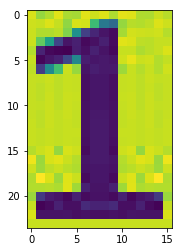

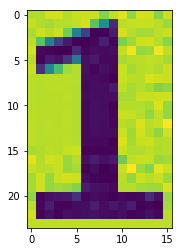

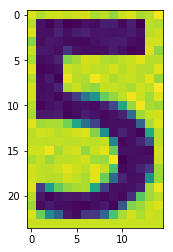

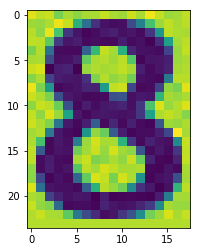

In [195]:
getCaptcha(1)

In [196]:
from keras.preprocessing import image
for f in os.listdir('digits/predict/'):
    fig = plt.figure()
    test_image = image.load_img('digits/predict/'+f, target_size= (60,40))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    print(f, classifier.predict_classes(test_image))
    #plt.imshow(img)

1_3.jpg [8]
1_2.jpg [5]
1_0.jpg [1]
1_1.jpg [1]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [142]:
classifier.save('captchabreak.hd5')

## 明星圖片分類

### 抓取明星圖片

In [198]:

import requests
res = requests.get('https://www.google.com/search?ei=ygx-XILhB6eMr7wPtZaZgAw&rlz=1C5CHFA_enTW718TW718&yv=3&q=%E5%BC%B5%E9%88%9E%E7%94%AF&tbm=isch&vet=10ahUKEwiC7pz1pergAhUnxosBHTVLBsAQuT0IdSgB.ygx-XILhB6eMr7wPtZaZgAw.i&ved=0ahUKEwiC7pz1pergAhUnxosBHTVLBsAQuT0IdSgB&ijn=2&start=200&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc')
#res.text

In [199]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text)

In [202]:
for ele in soup.select('img'):
    print(ele.get('data-src'))
    break

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR04aJ80DSrPqybj5ZiJEHcmTEpj2DolZYVo2VKOHcj_B_OnS9I1A


In [203]:
url   = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR04aJ80DSrPqybj5ZiJEHcmTEpj2DolZYVo2VKOHcj_B_OnS9I1A'
fname = url.split('tbn:')[1]
fname

'ANd9GcR04aJ80DSrPqybj5ZiJEHcmTEpj2DolZYVo2VKOHcj_B_OnS9I1A'

In [204]:
res = requests.get(url)
with open('{}.jpg'.format(fname), 'wb') as f:
    f.write(res.content)

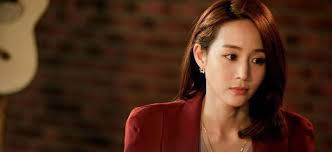

In [205]:
from PIL import Image
Image.open('{}.jpg'.format(fname))

### 圖片抓取函式

In [207]:
def getIdolPicture(idolname, start, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    res = requests.get('https://www.google.com/search?ei=ygx-XILhB6eMr7wPtZaZgAw&rlz=1C5CHFA_enTW718TW718&yv=3&q={}&tbm=isch&vet=10ahUKEwiC7pz1pergAhUnxosBHTVLBsAQuT0IdSgB.ygx-XILhB6eMr7wPtZaZgAw.i&ved=0ahUKEwiC7pz1pergAhUnxosBHTVLBsAQuT0IdSgB&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'.format(idolname, start))
    soup = BeautifulSoup(res.text)
    for ele in soup.select('img'):
        url = ele.get('data-src')
        fname = url.split('tbn:')[1]
        res = requests.get(url)
        with open('{}/{}.jpg'.format(dest,fname), 'wb') as f:
            f.write(res.content)

In [209]:
for i in range(0,3):
    getIdolPicture('謝金燕', i * 100, 'jeannie')

In [210]:
for i in range(0,3):
    getIdolPicture('周子瑜', i * 100, 'tzuyu')

In [211]:
for i in range(0,3):
    getIdolPicture('張鈞甯', i * 100, 'ning')

### OpenCV 安裝

- opencv_python‑3.4.5‑cp36‑cp36m‑win32.whl
- opencv_python‑3.4.5‑cp36‑cp36m‑win_amd64.whl

In [ ]:
! pip install opencv_python‑3.4.5‑cp36‑cp36m‑win_amd64.whl

### 下載 haar
- https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

### 取得臉部位置

In [212]:
import cv2

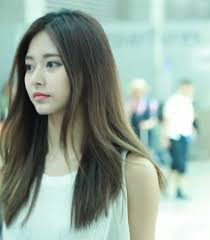

In [216]:
from PIL import Image
img = Image.open('tzuyu/ANd9GcQ4tJeNm9SPJSrq_6o6Fk9PpkXv0oOa23VZV7OC7-9jcSPkfFaYXg.jpg')
img

In [217]:
import cv2 as cv
imgary = cv.imread('tzuyu/ANd9GcQ4tJeNm9SPJSrq_6o6Fk9PpkXv0oOa23VZV7OC7-9jcSPkfFaYXg.jpg')

In [218]:
imgary.shape

(240, 210, 3)

In [219]:
import cv2
face_cascade = cv2.CascadeClassifier('/Users/davidchiu/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(imgary, 1.3, 5)

In [220]:
faces

array([[12, 44, 63, 63]], dtype=int32)

In [221]:
x,y,w,h = faces[0]

In [222]:
crpim = img.crop((x,y, x + w, y + h)).resize((64,64))

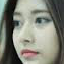

In [223]:
crpim

### 擷取臉部函數

In [224]:
def cropIdolFace(src, dst):
    if not os.path.exists(dst):
        os.mkdir(dst)
        
    for fname in os.listdir(src):
        img = Image.open('{}/{}'.format(src, fname))
        imgary = cv.imread('{}/{}'.format(src, fname))
        face_cascade = cv2.CascadeClassifier('/Users/davidchiu/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
        faces = face_cascade.detectMultiScale(imgary, 1.3, 5)
        if len(faces) == 1:
            x,y,w,h = faces[0]
            crpim = img.crop((x,y, x + w, y + h)).resize((64,64))
            crpim.save('{}/{}'.format(dst , fname))

In [225]:
cropIdolFace('tzuyu', 'tzuyu_face')

In [226]:
cropIdolFace('jeannie', 'jeannie_face')

In [227]:
cropIdolFace('ning', 'ning_face')

### 建構CNN  做人臉識別

In [228]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [229]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [230]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [231]:
import os
tzuyu   = os.listdir('tzuyu_face/')
jeannie = os.listdir('jeannie_face/')
ning    = os.listdir('ning_face/')

In [232]:
from sklearn.model_selection import train_test_split
tzuyu_train ,tzuyu_test  = \
    train_test_split(tzuyu, test_size = 0.2, random_state = 42)
jeannie_train ,jeannie_test  = \
    train_test_split(jeannie, test_size = 0.2, random_state = 42)
ning_train ,ning_test  = \
    train_test_split(ning, test_size = 0.2, random_state = 42)

In [239]:
os.mkdir('trainset')
os.mkdir('testset')

In [240]:
os.mkdir('trainset/tzuyu_face')
os.mkdir('trainset/jeannie_face')
os.mkdir('trainset/ning_face')

In [241]:
from shutil import copyfile

for f in tzuyu_train:
    src = 'tzuyu_face/'+ f
    dst = 'trainset/'+'tzuyu_face/'+f
    copyfile(src, dst)
    
for f in jeannie_train:
    src = 'jeannie_face/'+ f
    dst = 'trainset/'+'jeannie_face/'+f
    copyfile(src, dst)
    
for f in ning_train:
    src = 'ning_face/'+ f
    dst = 'trainset/'+'ning_face/'+f
    copyfile(src, dst)

In [243]:
os.mkdir('testset/tzuyu_face')
os.mkdir('testset/jeannie_face')
os.mkdir('testset/ning_face')

In [244]:
from shutil import copyfile

for f in tzuyu_test:
    src = 'tzuyu_face/'+ f
    dst = 'testset/'+'tzuyu_face/'+f
    copyfile(src, dst)
    
for f in jeannie_test:
    src = 'jeannie_face/'+ f
    dst = 'testset/'+'jeannie_face/'+f
    copyfile(src, dst)
    
for f in ning_test:
    src = 'ning_face/'+ f
    dst = 'testset/'+'ning_face/'+f
    copyfile(src, dst)

In [245]:
training_set = train_datagen.flow_from_directory(
    'trainset/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 399 images belonging to 3 classes.


In [246]:
test_set = test_datagen.flow_from_directory(
    'testset/', target_size = (64, 64),
    batch_size = 10, 
    class_mode = 'categorical')

Found 100 images belonging to 3 classes.


In [250]:
history = classifier.fit_generator(training_set,
                         nb_epoch=10,
                         nb_val_samples=30,
                         steps_per_epoch = 30,
                         verbose = 1,
                         validation_data = test_set)

Epoch 1/10
 1/30 [>.............................] - ETA: 4s - loss: 0.1676 - acc: 0.9000

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=30, verbose=1, validation_data=<keras.pre..., epochs=10, validation_steps=30)`
  


30/30 [==============================] - 2s 55ms/step - loss: 0.3022 - acc: 0.8767 - val_loss: 0.5983 - val_acc: 0.7900
Epoch 2/10
30/30 [==============================] - 2s 54ms/step - loss: 0.2410 - acc: 0.9200 - val_loss: 0.6002 - val_acc: 0.8000
Epoch 3/10
30/30 [==============================] - 2s 55ms/step - loss: 0.2556 - acc: 0.9066 - val_loss: 0.5829 - val_acc: 0.8100
Epoch 4/10
30/30 [==============================] - 2s 52ms/step - loss: 0.3053 - acc: 0.9000 - val_loss: 0.6571 - val_acc: 0.7900
Epoch 5/10
30/30 [==============================] - 2s 54ms/step - loss: 0.2839 - acc: 0.9000 - val_loss: 0.5903 - val_acc: 0.8000
Epoch 6/10
30/30 [==============================] - 2s 54ms/step - loss: 0.2395 - acc: 0.9300 - val_loss: 0.6296 - val_acc: 0.8200
Epoch 7/10
30/30 [==============================] - 2s 58ms/step - loss: 0.1637 - acc: 0.9500 - val_loss: 0.6659 - val_acc: 0.8100
Epoch 8/10
30/30 [==============================] - 2s 56ms/step - loss: 0.2543 - acc: 0.8993 

### 利用模型分類圖片

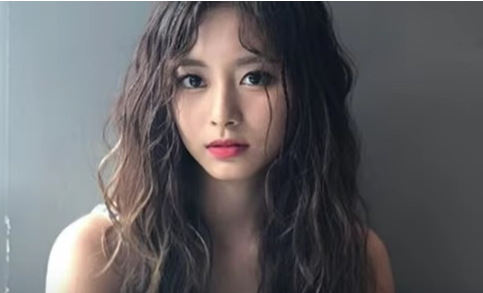

In [251]:
from PIL import Image
Image.open('gfriend.png')

In [253]:
from PIL import Image
img = Image.open('gfriend.png')

In [255]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('/Users/davidchiu/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')

img = cv.imread('gfriend.png')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces[0]

array([147,  21, 167, 167], dtype=int32)

In [256]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)

im = Image.open('gfriend.png')
crpim = im.crop(box).resize((64,64))
crpim.save('gfriend_face.png')

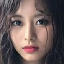

In [257]:
crpim

In [258]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('gfriend_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape

(64, 64, 3)

In [259]:
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape

(1, 64, 64, 3)

In [260]:
classifier.predict_classes(test_image)

array([2])

In [263]:
training_set.class_indices

{'jeannie_face': 0, 'ning_face': 1, 'tzuyu_face': 2}

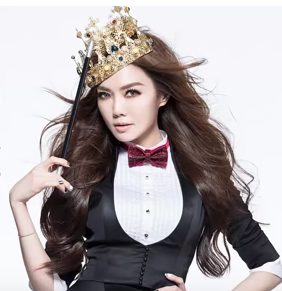

In [268]:
from PIL import Image
Image.open('jj.png')

In [269]:
from PIL import Image
import cv2 as cv
face_cascade = cv.CascadeClassifier('/Users/davidchiu/anaconda3/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')

img = cv.imread('jj.png')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces[0]

array([87, 66, 72, 72], dtype=int32)

In [270]:
x,y,w,h = faces[0]
box = (x, y, x+w, y+h)

im = Image.open('jj.png')
crpim = im.crop(box).resize((64,64))
crpim.save('jj_face.png')

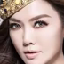

In [271]:
crpim

In [274]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('jj_face.png', target_size= (64,64))
test_image = image.img_to_array(test_image)
test_image.shape
test_image = np.expand_dims(test_image, axis = 0)
type(test_image)
test_image.shape
classifier.predict_classes(test_image)

array([0])

## 建立Auto Encoder

In [275]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [276]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [277]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [278]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### 讀取MNIST 數據

In [279]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [280]:
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test  = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [281]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.3702 - val_loss: 0.2716
Epoch 2/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2630 - val_loss: 0.2510
Epoch 3/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2408 - val_loss: 0.2285
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.2213 - val_loss: 0.2118
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2070 - val_loss: 0.1996
Epoch 6/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1963 - val_loss: 0.1903
Epoch 7/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1879 - val_loss: 0.1826
Epoch 8/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1809 - val_loss: 0.1765
Epoch 9/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.1749 - val_loss: 0.1708
Epoch

### 檢視原始與重建數據

In [282]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['box', 'random', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


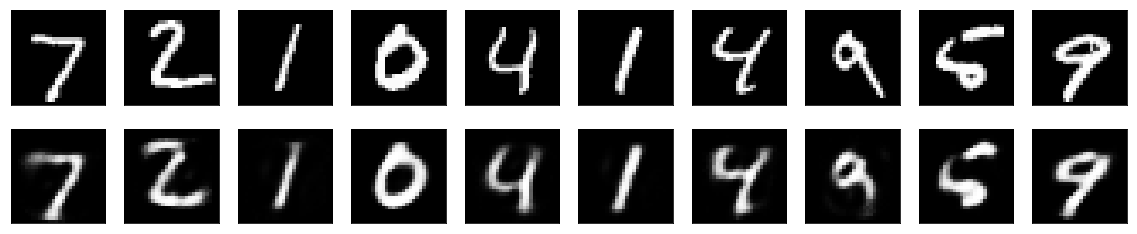

In [283]:
%pylab inline
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 預測Credit Fraud

### 引用套件

In [284]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

%pylab inline

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

Populating the interactive namespace from numpy and matplotlib


### 讀取資料
- https://www.kaggle.com/mlg-ulb/creditcardfraud

In [286]:
import pandas as pd
df = pd.read_csv("creditcard.csv")

In [287]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 資料探索

Text(0,0.5,'Frequency')

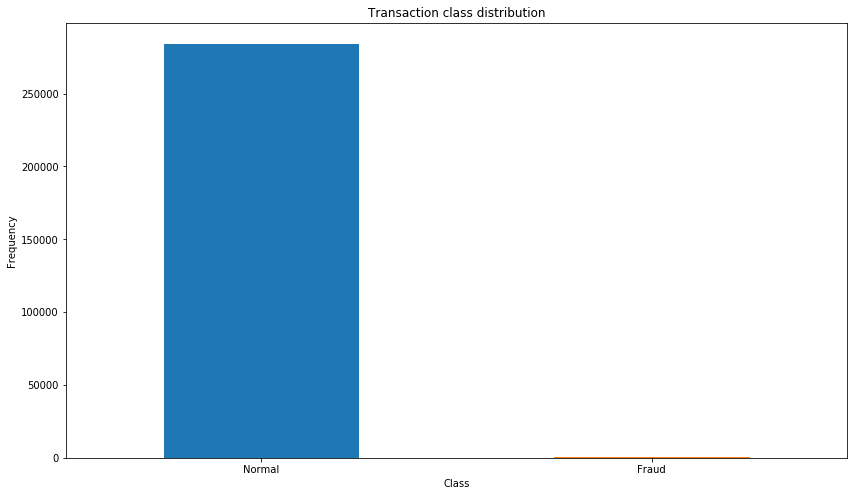

In [288]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [289]:
count_classes

0    284315
1       492
Name: Class, dtype: int64

### 檢視交易金額

In [290]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]

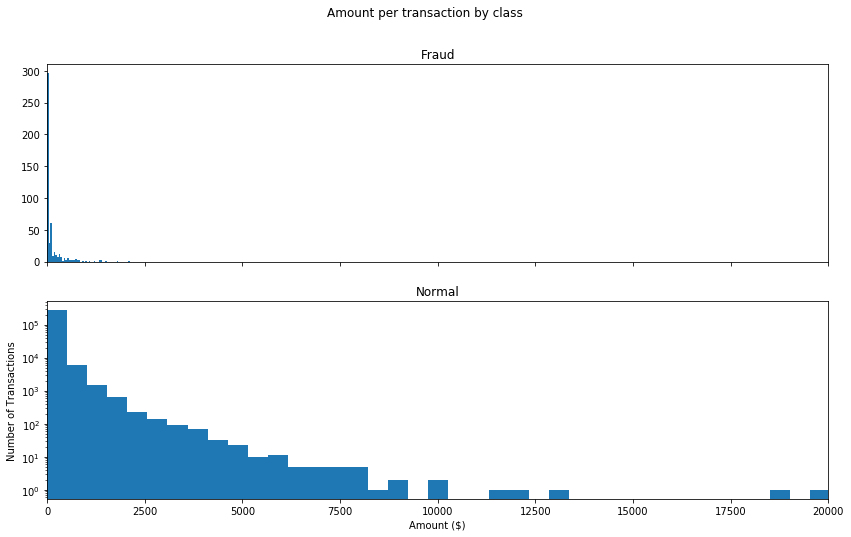

In [291]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

### 檢視是否轉帳時間很重要

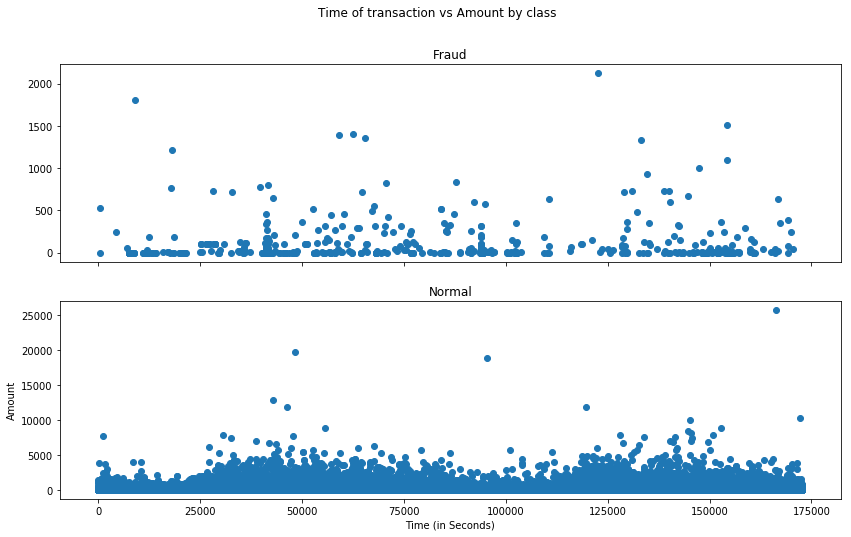

In [292]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### 標準化資料

In [293]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

### 將資料分為訓練與測試資料集

In [294]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

### 建立 Auto Encoders

In [295]:
input_dim = X_train.shape[1]
encoding_dim = 14

In [296]:
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(7, activation="relu")(encoder)

decoder = Dense(7, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

In [297]:
nb_epoch = 10
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer]).history

Train on 227451 samples, validate on 56962 samples
Epoch 1/10
227451/227451 [==============================] - 11s 51us/step - loss: 0.8385 - acc: 0.5675 - val_loss: 0.8120 - val_acc: 0.6262
Epoch 2/10
227451/227451 [==============================] - 11s 49us/step - loss: 0.7686 - acc: 0.6359 - val_loss: 0.7903 - val_acc: 0.6443
Epoch 3/10
227451/227451 [==============================] - 11s 49us/step - loss: 0.7567 - acc: 0.6512 - val_loss: 0.7834 - val_acc: 0.6516
Epoch 4/10
227451/227451 [==============================] - 11s 48us/step - loss: 0.7520 - acc: 0.6539 - val_loss: 0.7789 - val_acc: 0.6598
Epoch 5/10
227451/227451 [==============================] - 11s 49us/step - loss: 0.7437 - acc: 0.6578 - val_loss: 0.7742 - val_acc: 0.6581
Epoch 6/10
227451/227451 [==============================] - 12s 51us/step - loss: 0.7387 - acc: 0.6623 - val_loss: 0.7681 - val_acc: 0.6661
Epoch 7/10
227451/227451 [==============================] - 11s 49us/step - loss: 0.7362 - acc: 0.6636 - val_

In [298]:
autoencoder = load_model('model.h5')

### 評估模型

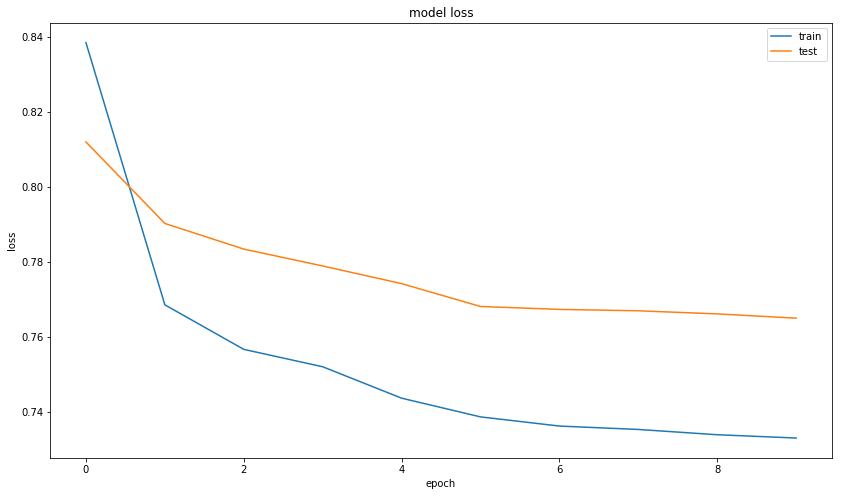

In [299]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [300]:
predictions = autoencoder.predict(X_test)

In [302]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [305]:
#error_df

In [306]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

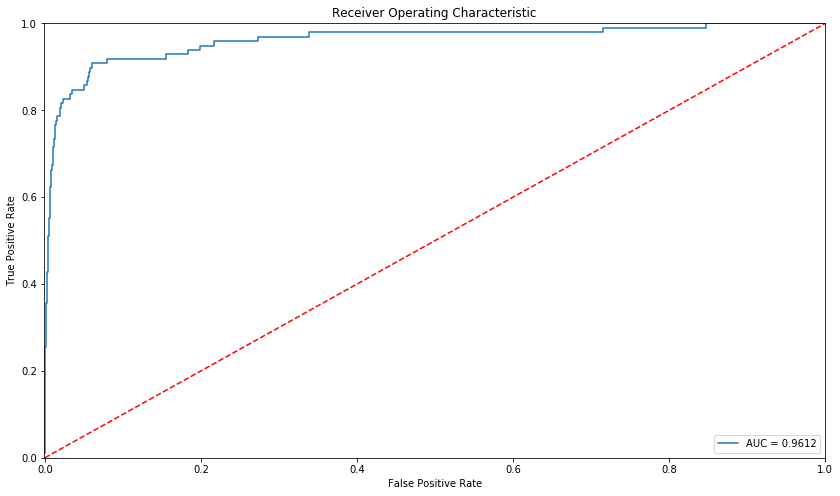

In [307]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 預測類別

In [308]:
threshold = 2.9

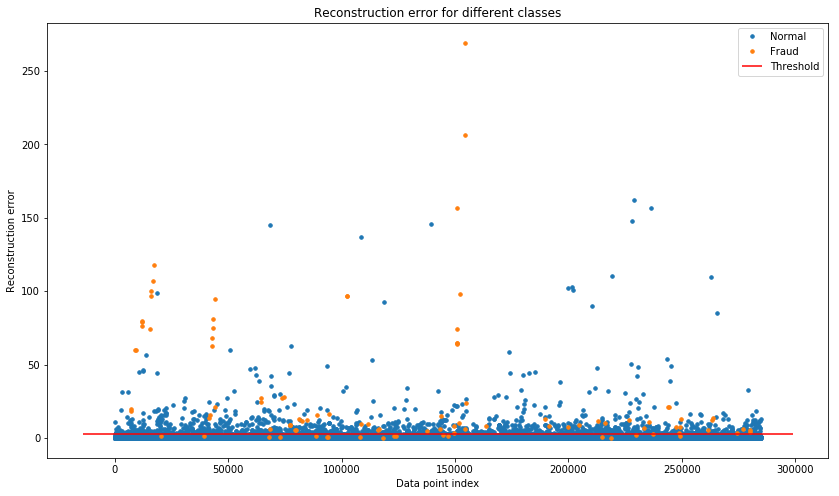

In [309]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

### 建立Confusion Matrix

In [310]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
conf_matrix

array([[55462,  1402],
       [   17,    81]])

### 找出最佳切點

In [311]:
i = np.arange(len(tpr)) 
roc = pd.DataFrame(
    {'fpr' : pd.Series(fpr, index=i),
     'tpr' : pd.Series(tpr, index = i), 
     '1-fpr' : pd.Series(1-fpr, index = i), 
     'tf' : pd.Series(tpr - (1-fpr), index = i), 
     'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,fpr,tpr,1-fpr,tf,thresholds
172,0.081633,0.918367,0.918367,7.177885e-07,1.10389


In [314]:
threshold = 1.10389

In [315]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
conf_matrix

array([[52223,  4641],
       [    8,    90]])